## Практическое задание 7

### Банникова Екатерина Алексеевна НПМбд-01-19

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылка на посылку в Яндекс.Контесте:

В контест https://contest.yandex.ru/contest/9963/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

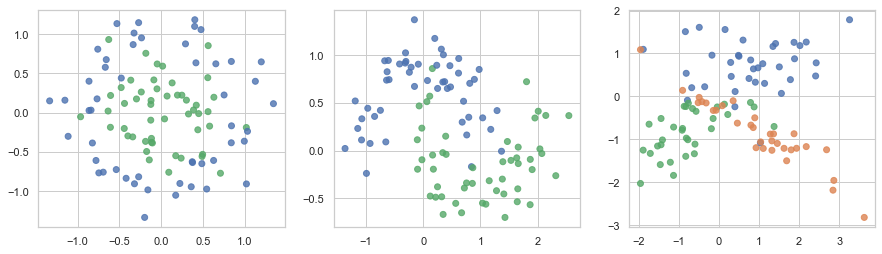

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

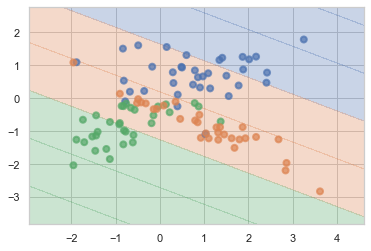

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Circles 
Train accuracy: 1.0 Train


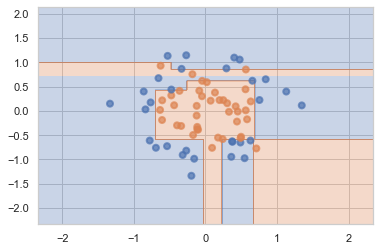

Circles 
Test accuracy: 0.7666666666666667 Test


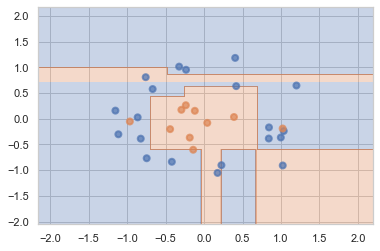

Moons 
Train accuracy: 1.0 Train


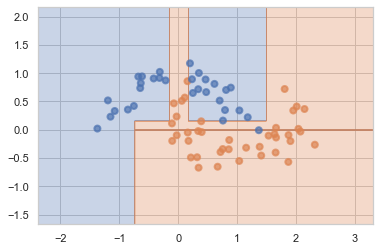

Moons 
Test accuracy: 0.8666666666666667 Test


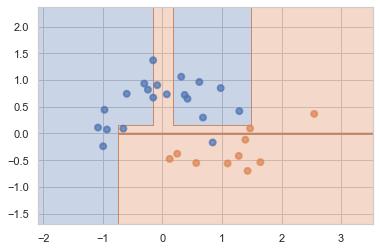

Classification 
Train accuracy: 1.0 Train


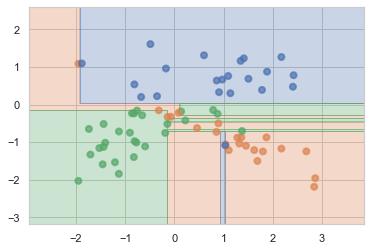

Classification 
Test accuracy: 0.8 Test


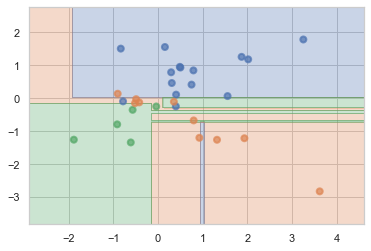

In [13]:
name = ['Circles', 'Moons', 'Classification']
for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    dt = DecisionTreeClassifier().fit(X_train, y_train)
    print(name[i], '\nTrain accuracy:', accuracy_score(y_train, dt.predict(X_train)), 'Train')
    plot_surface(dt, X_train, y_train)
    plt.show()
    print(name[i], '\nTest accuracy:', accuracy_score(y_test, dt.predict(X_test)), 'Test')
    plot_surface(dt, X_test, y_test)
    plt.show()

__Ответ:__

Есть признаки переобучения. 
Точность на обучающих объектах 100%, но на тестовой она уже ниже. 

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Circles 
Max_depth: 1 min_samples_leaf: 1
Train accuracy: 0.74
Train


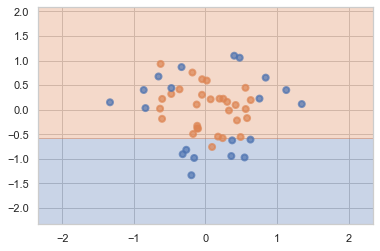

Test accuracy: 0.56
Test


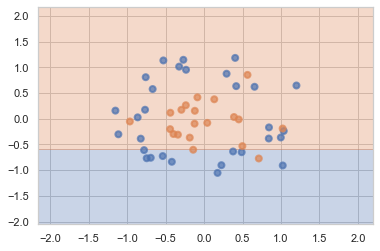

Circles 
Max_depth: 2 min_samples_leaf: 2
Train accuracy: 0.82
Train


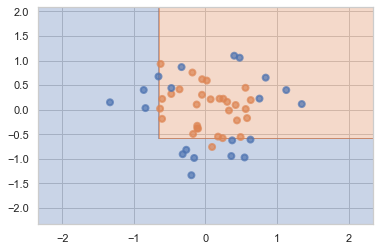

Test accuracy: 0.68
Test


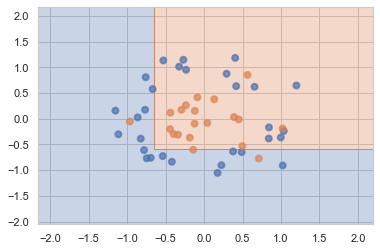

Circles 
Max_depth: 3 min_samples_leaf: 3
Train accuracy: 0.9
Train


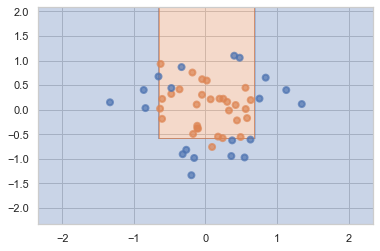

Test accuracy: 0.76
Test


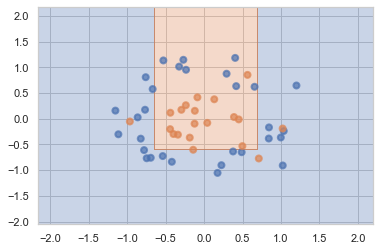

Circles 
Max_depth: 4 min_samples_leaf: 4
Train accuracy: 0.94
Train


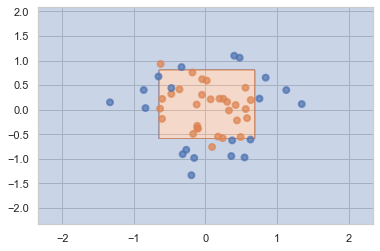

Test accuracy: 0.86
Test


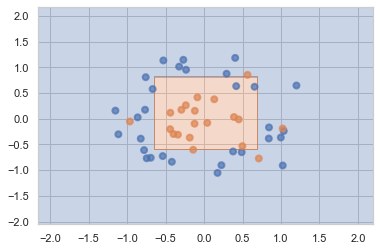

Circles 
Max_depth: 5 min_samples_leaf: 1
Train accuracy: 0.98
Train


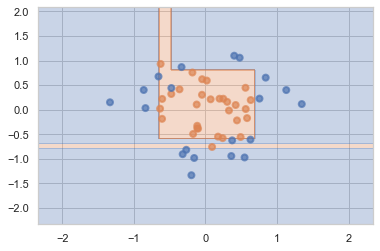

Test accuracy: 0.8
Test


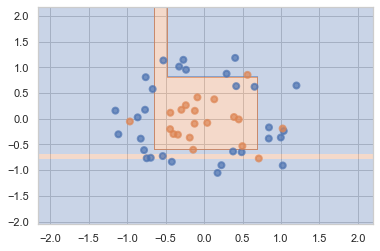

Circles 
Max_depth: 6 min_samples_leaf: 2
Train accuracy: 0.94
Train


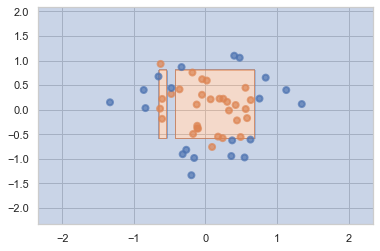

Test accuracy: 0.82
Test


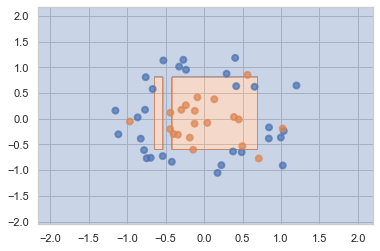

Circles 
Max_depth: 7 min_samples_leaf: 3
Train accuracy: 0.94
Train


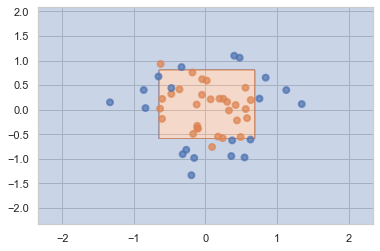

Test accuracy: 0.86
Test


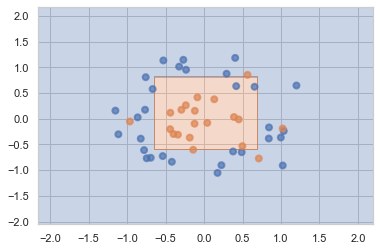

Circles 
Max_depth: 8 min_samples_leaf: 4
Train accuracy: 0.94
Train


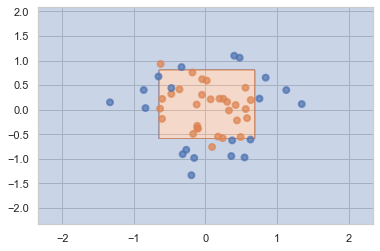

Test accuracy: 0.86
Test


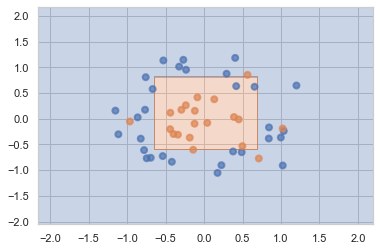

Moons 
Max_depth: 1 min_samples_leaf: 1
Train accuracy: 0.84
Train


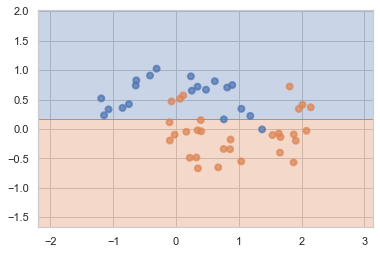

Test accuracy: 0.82
Test


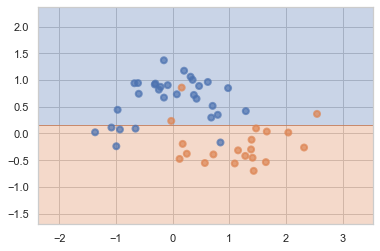

Moons 
Max_depth: 2 min_samples_leaf: 2
Train accuracy: 0.92
Train


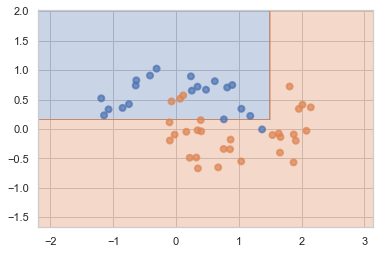

Test accuracy: 0.84
Test


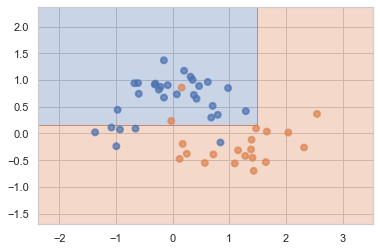

Moons 
Max_depth: 3 min_samples_leaf: 3
Train accuracy: 0.92
Train


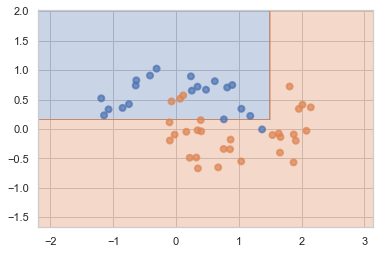

Test accuracy: 0.84
Test


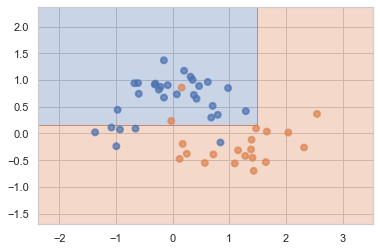

Moons 
Max_depth: 4 min_samples_leaf: 4
Train accuracy: 0.96
Train


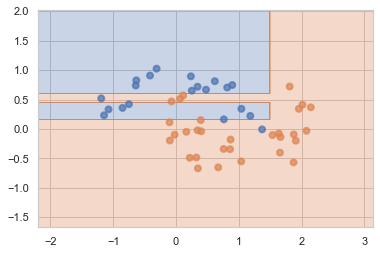

Test accuracy: 0.82
Test


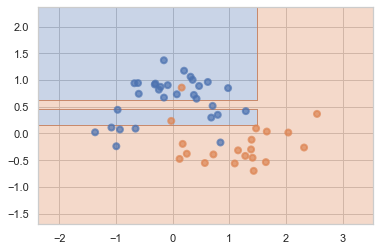

Moons 
Max_depth: 5 min_samples_leaf: 1
Train accuracy: 1.0
Train


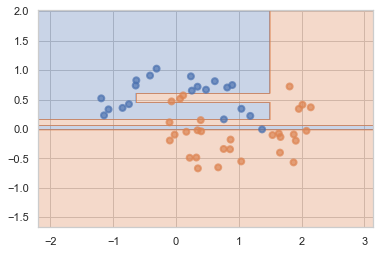

Test accuracy: 0.8
Test


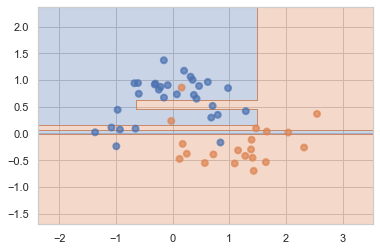

Moons 
Max_depth: 6 min_samples_leaf: 2
Train accuracy: 0.96
Train


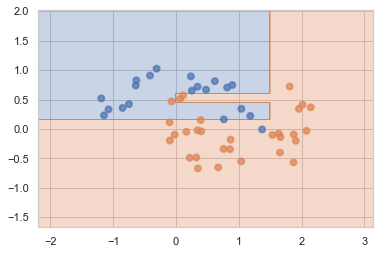

Test accuracy: 0.82
Test


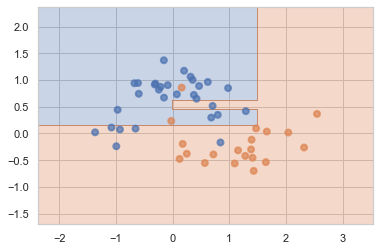

Moons 
Max_depth: 7 min_samples_leaf: 3
Train accuracy: 0.96
Train


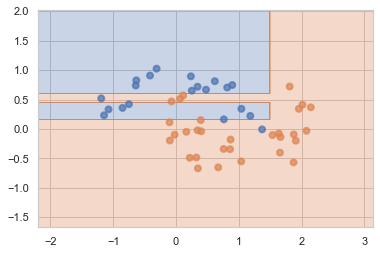

Test accuracy: 0.82
Test


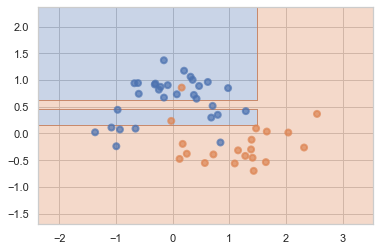

Moons 
Max_depth: 8 min_samples_leaf: 4
Train accuracy: 0.96
Train


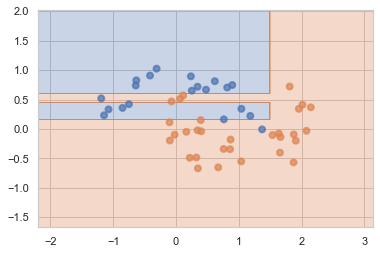

Test accuracy: 0.82
Test


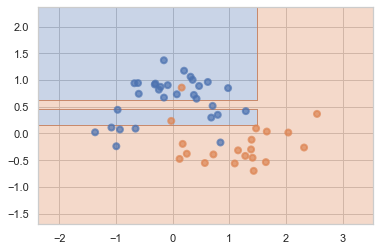

Classification 
Max_depth: 1 min_samples_leaf: 1
Train accuracy: 0.68
Train


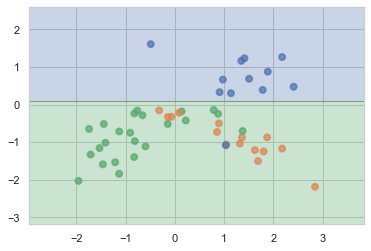

Test accuracy: 0.6
Test


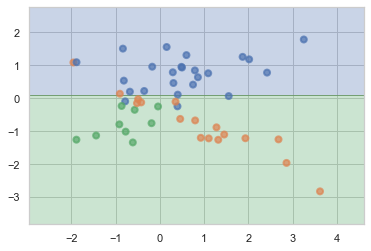

Classification 
Max_depth: 2 min_samples_leaf: 2
Train accuracy: 0.86
Train


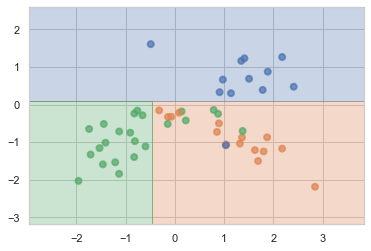

Test accuracy: 0.82
Test


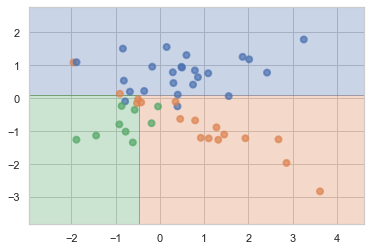

Classification 
Max_depth: 3 min_samples_leaf: 3
Train accuracy: 0.88
Train


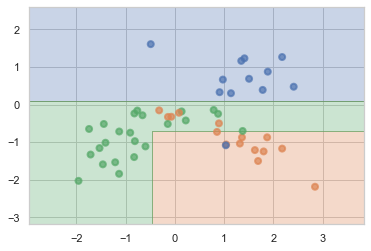

Test accuracy: 0.76
Test


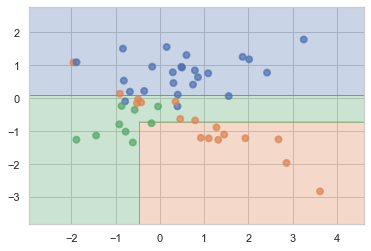

Classification 
Max_depth: 4 min_samples_leaf: 4
Train accuracy: 0.94
Train


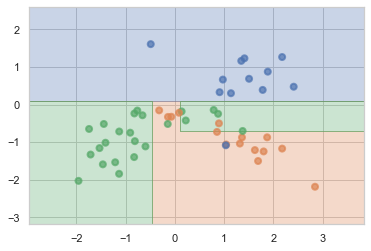

Test accuracy: 0.76
Test


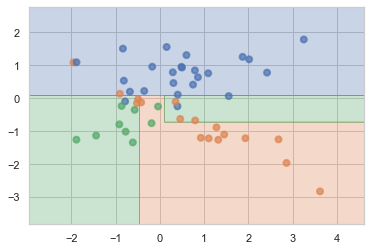

Classification 
Max_depth: 5 min_samples_leaf: 1
Train accuracy: 0.98
Train


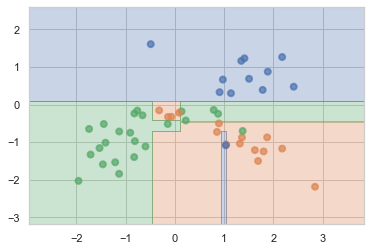

Test accuracy: 0.8
Test


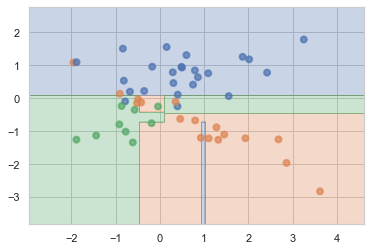

Classification 
Max_depth: 6 min_samples_leaf: 2
Train accuracy: 0.94
Train


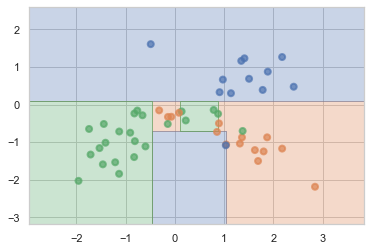

Test accuracy: 0.74
Test


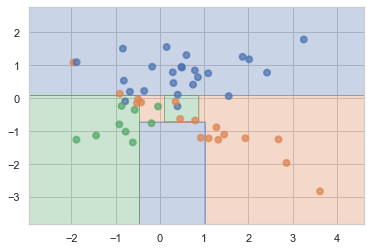

Classification 
Max_depth: 7 min_samples_leaf: 3
Train accuracy: 0.94
Train


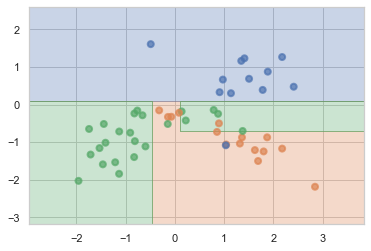

Test accuracy: 0.76
Test


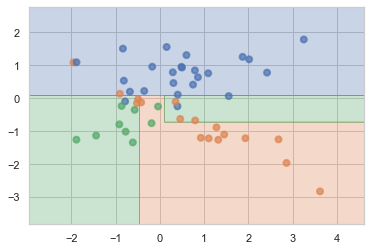

Classification 
Max_depth: 8 min_samples_leaf: 4
Train accuracy: 0.94
Train


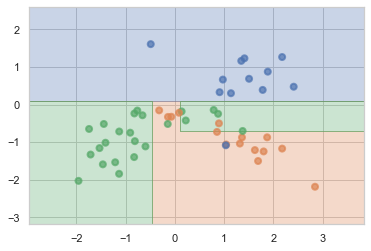

Test accuracy: 0.76
Test


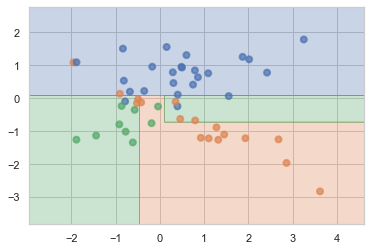

In [29]:
name = ['Circles', 'Moons', 'Classification']
for i, (x, y) in enumerate(datasets):
    for depth, samples in zip(range(1,10), list(range(1,5))*2):
        X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.5)
        print(name[i], '\nMax_depth:', depth, 'min_samples_leaf:', samples)
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples).fit(X_train,y_train)
        print('Train accuracy:', accuracy_score(y_train,dt.predict(X_train)))
        print('Train')
        plot_surface(dt, X_train, y_train)
        plt.show()
        print('Test accuracy:', accuracy_score(y_test,dt.predict(X_test)))
        print('Test')
        plot_surface(dt, X_test, y_test)
        plt.show()

__Ответ:__

При увеличении максимальной глубины и уменьшении минимального количества объектов модель сильнее подстраивается под обучающую выборку. В обратном случае, обобщающая способность моделей растет.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

## Нет данных для заданий 3-6

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [31]:
from hw5code import find_best_split

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
frame = pd.read_csv('students.csv')

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [32]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [33]:
for i in range(len(mushrooms.columns)):
    mushrooms.iloc[:, i] = LabelEncoder().fit_transform(mushrooms.iloc[:, i])
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [39]:
target_mushrooms = np.array(mushrooms['p'])
others_mushrooms = np.array(mushrooms.drop('p', axis = 1))
x_train, x_test, y_train, y_test = train_test_split(others_mushrooms, target_mushrooms, test_size = 0.5, random_state = 42)
dt_mushrooms = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy:', dt_mushrooms.score(x_test, y_test))

Accuracy: 1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [40]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [41]:
for i in range(len(tic_tac_toe.columns)):
    tic_tac_toe.iloc[:, i] = LabelEncoder().fit_transform(tic_tac_toe.iloc[:, i])
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


Text(0.5, 1.0, 'min_samples_leaf')

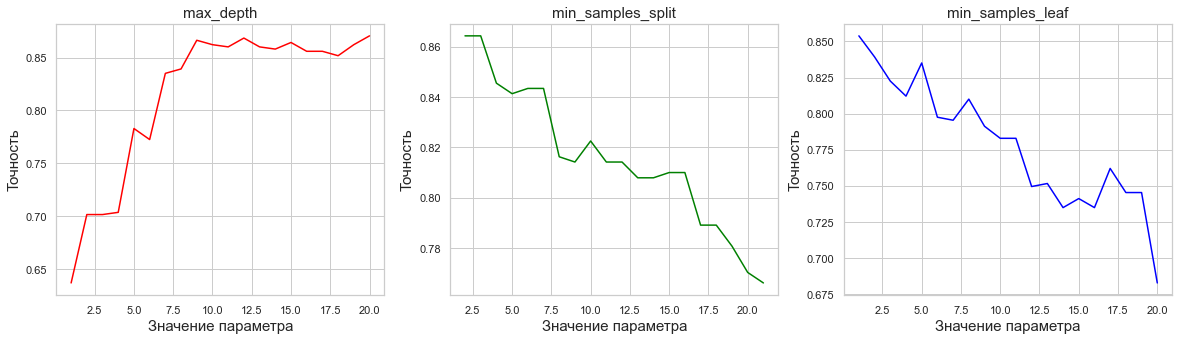

In [47]:
target_tic_tac_toe = np.array(tic_tac_toe['positive'])
others_tic_tac_toe = np.array(tic_tac_toe.drop('positive', axis = 1))
x_train, x_test, y_train, y_test = train_test_split(others_tic_tac_toe, target_tic_tac_toe, test_size = 0.5, random_state = 42)
accuracy_max_depth, accuracy_min_samples_split, accuracy_min_samples_leaf = np.zeros(20), np.zeros(20), np.zeros(20)

for i in range(20):
    dt_max_depth = DecisionTreeClassifier(max_depth = i + 1).fit(x_train, y_train)
    dt_min_samples_split = DecisionTreeClassifier(min_samples_split = i + 2).fit(x_train, y_train)
    dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf = i + 1).fit(x_train, y_train)
    accuracy_max_depth[i] = dt_max_depth.score(x_test, y_test)
    accuracy_min_samples_split[i] = dt_min_samples_split.score(x_test, y_test)
    accuracy_min_samples_leaf[i] = dt_min_samples_leaf.score(x_test, y_test)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].plot(np.arange(1, 21), accuracy_max_depth, color = 'red')
ax[0].set_xlabel('Значение параметра', fontsize = 15)
ax[0].set_ylabel('Точность', fontsize = 15)
ax[0].set_title('max_depth', fontsize = 15)

ax[1].plot(np.arange(2, 22), accuracy_min_samples_split, color = 'green')
ax[1].set_xlabel('Значение параметра', fontsize = 15)
ax[1].set_ylabel('Точность', fontsize = 15)
ax[1].set_title('min_samples_split', fontsize = 15)

ax[2].plot(np.arange(1, 21), accuracy_min_samples_leaf, color = 'blue')
ax[2].set_xlabel('Значение параметра', fontsize = 15)
ax[2].set_ylabel('Точность', fontsize = 15)
ax[2].set_title('min_samples_leaf', fontsize = 15)

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [46]:
car = pd.read_csv('car.data')
print(car['unacc'].unique())
car    

['unacc' 'acc' 'vgood' 'good']


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [47]:
car.loc[(car['unacc'] == 'unacc'), 'unacc'] = 'acc'
car.loc[(car['unacc'] == 'vgood'), 'unacc'] = 'good'
car['unacc'].unique()

array(['acc', 'good'], dtype=object)

In [48]:
for i in range(len(car.columns)):
    car.iloc[:, i] = LabelEncoder().fit_transform(car.iloc[:, i])
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,1
1724,1,1,3,2,0,1,0
1725,1,1,3,2,0,2,1


In [49]:
target_car = np.array(car['unacc'])
others_car = np.array(car.drop('unacc', axis = 1))

In [50]:
nursery = pd.read_csv('nursery.data')
print(nursery['recommend'].unique())
nursery

['priority' 'not_recom' 'recommend' 'very_recom' 'spec_prior']


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [51]:
nursery.loc[(nursery['recommend'] == 'not_recom'),
            'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'),
            'recommend'] = 'priority'
nursery['recommend'].unique()

array(['priority', 'recommend'], dtype=object)

In [52]:
for i in range(len(nursery.columns)):
    nursery.iloc[:, i] = LabelEncoder().fit_transform(nursery.iloc[:, i])
nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,0
1,2,3,0,0,0,0,0,0,1
2,2,3,0,0,0,0,2,2,1
3,2,3,0,0,0,0,2,1,0
4,2,3,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...
12954,0,4,2,3,1,1,2,1,0
12955,0,4,2,3,1,1,2,0,1
12956,0,4,2,3,1,1,1,2,0
12957,0,4,2,3,1,1,1,1,0


In [54]:
target_nursery = np.array(nursery['recommend'])
others_nursery = np.array(nursery.drop('recommend', axis = 1))

In [57]:
from sklearn.model_selection import cross_val_score

print('Accuracy mushrooms:', cross_val_score(DecisionTreeClassifier(), others_mushrooms, target_mushrooms, cv = 10).mean())
print('Accuracy tic_tac_toe:', cross_val_score(DecisionTreeClassifier(), others_tic_tac_toe, target_tic_tac_toe, cv = 10).mean())
print('Accuracy car:', cross_val_score(DecisionTreeClassifier(), others_car, target_car, cv = 10).mean())
print('Accuracy nursery:', cross_val_score(DecisionTreeClassifier(), others_nursery, target_nursery, cv = 10).mean())

Accuracy mushrooms: 0.9627233562976023
Accuracy tic_tac_toe: 0.7850767543859649
Accuracy car: 0.9443708831832234
Accuracy nursery: 0.9998456790123458
